In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

In [4]:
bh = datasets.load_boston()

In [8]:
bh.keys()

dict_keys(['feature_names', 'target', 'DESCR', 'data'])

In [9]:
bh.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

In [10]:
df= pd.DataFrame(data=bh.data, columns=bh.feature_names)

In [12]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
df['price']=bh.target

In [15]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
df['price'];

In [19]:
X =df[['ZN','CRIM', 'RM','AGE','LSTAT', 'DIS']]

In [21]:
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 478 to 102
Data columns (total 6 columns):
ZN       339 non-null float64
CRIM     339 non-null float64
RM       339 non-null float64
AGE      339 non-null float64
LSTAT    339 non-null float64
DIS      339 non-null float64
dtypes: float64(6)
memory usage: 18.5 KB


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
lr.intercept_

9.0074180158499786

In [36]:
lr.coef_

array([ 0.05821565, -0.1723516 ,  4.52234585, -0.02524647, -0.66881225,
       -1.23894788])

In [38]:
X_train.columns

Index(['ZN', 'CRIM', 'RM', 'AGE', 'LSTAT', 'DIS'], dtype='object')

In [39]:
coeffDf= pd.DataFrame(columns=['coefficient'], index=X_train.columns, data = lr.coef_)

In [64]:
coeffDf.head(100)

,coefficient
ZN,0.058216
CRIM,-0.172352
RM,4.522346
AGE,-0.025246
LSTAT,-0.668812
DIS,-1.238948


In [42]:
y_pred = lr.predict(X_test)

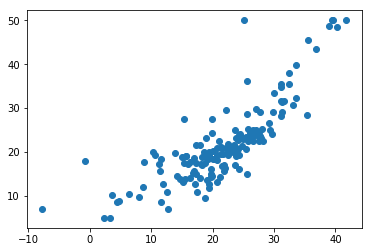

In [44]:
plt.scatter(y_pred,y_test)

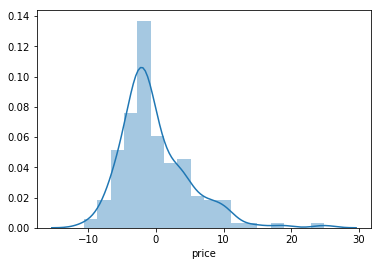

In [45]:
sns.distplot(y_test- y_pred)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [70]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  3.86943853135
MSE:  26.5810919293
RMSE:  5.15568539859


In [63]:
cm = confusion_matrix(y_test, y_pred)
#cr = classification_report(y_test, y_pred)

ValueError: continuous is not supported